In [587]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

The comp-activ databases is a collection of a computer systems activity measures .
The data was collected from a Sun Sparcstation 20/712 with 128 Mbytes of memory running in a multi-user university department. Users would typically be doing a large variety of tasks ranging from accessing the internet, editing files or running very cpu-bound programs. 
As you are a budding data scientist you thought to find out a linear equation to build a model to predict 'usr'(Portion of time (%) that cpus run in user mode) and to find out how each attribute affects the system to be in 'usr' mode using a list of system attributes.


In [649]:
df=pd.read_excel(r"D:\DSBA\The course\PM_project\compactiv.xlsx")

#### 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [589]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


In [590]:
df.shape

(8192, 22)

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

### Creating 5 point summary

In [592]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lread,8192.0,1.955969e+01,53.353799,0.0,2.0,7.0,20.000,1845.00
lwrite,8192.0,1.310620e+01,29.891726,0.0,0.0,1.0,10.000,575.00
scall,8192.0,2.306318e+03,1633.617322,109.0,1012.0,2051.5,3317.250,12493.00
sread,8192.0,2.104800e+02,198.980146,6.0,86.0,166.0,279.000,5318.00
swrite,8192.0,1.500582e+02,160.478980,7.0,63.0,117.0,185.000,5456.00
fork,8192.0,1.884554e+00,2.479493,0.0,0.4,0.8,2.200,20.12
exec,8192.0,2.791998e+00,5.212456,0.0,0.2,1.2,2.800,59.56
rchar,8088.0,1.973857e+05,239837.493526,278.0,34091.5,125473.5,267828.750,2526649.00
wchar,8177.0,9.590299e+04,140841.707911,1498.0,22916.0,46619.0,106101.000,1801623.00
pgout,8192.0,2.285317e+00,5.307038,0.0,0.0,0.0,2.400,81.44


In [593]:
## Checking for duplicates


In [650]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


Number of duplicate rows = 0


## Exploratory Data Analysis (EDA)

## Univariate analysis 

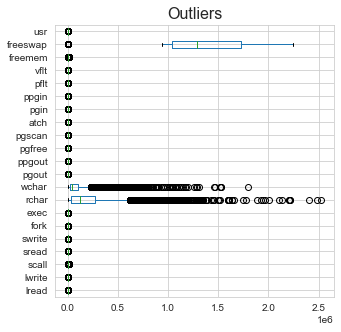

In [595]:
# checking presence of outliers
plt.figure(figsize=(5,5))
df.boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

In [596]:
## Thus the two variables wchar and rchar are having significant outliers

As wchar,freeswap,rchar has high magnitude, we'll not consider the variable so that we can observe other variables, which are in a similar scale

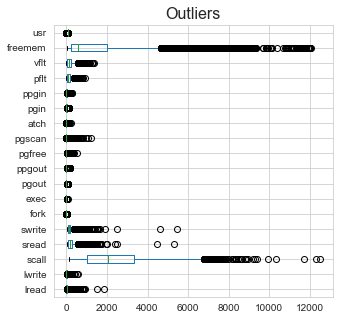

In [598]:
# checking presence of outliers
plt.figure(figsize=(5,5))
df.drop(['wchar','freeswap','rchar' ], axis=1).boxplot(vert=0)
plt.title('Outliers',fontsize=16)
plt.show()

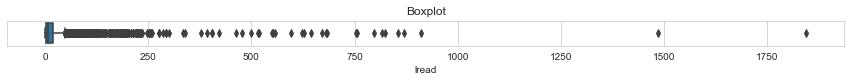

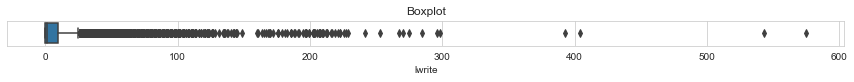

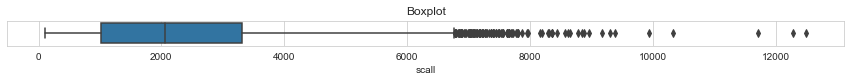

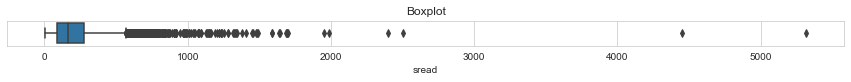

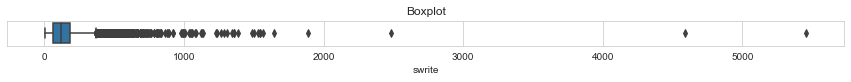

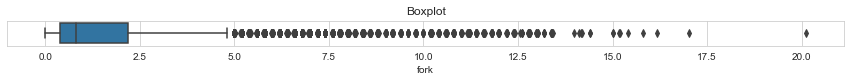

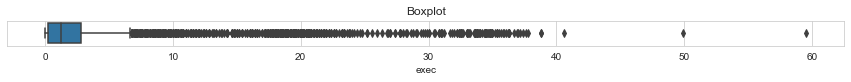

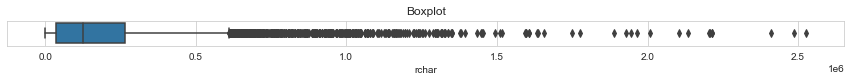

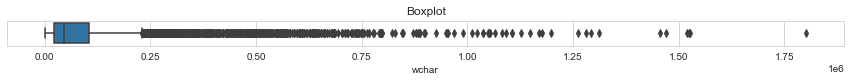

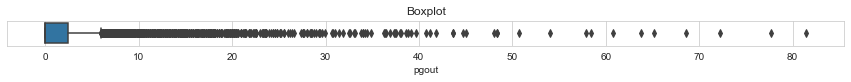

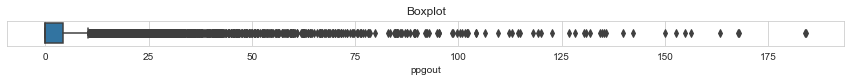

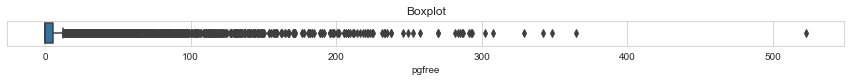

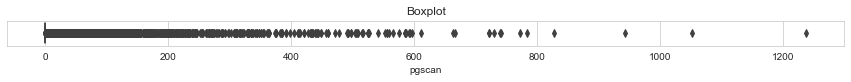

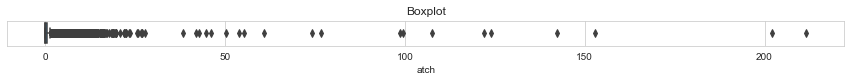

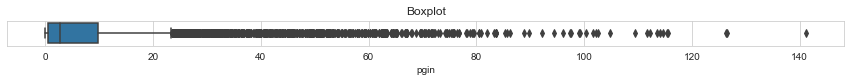

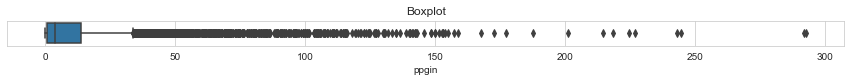

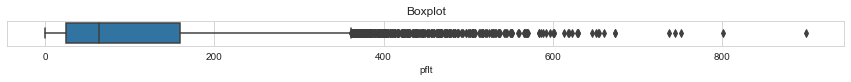

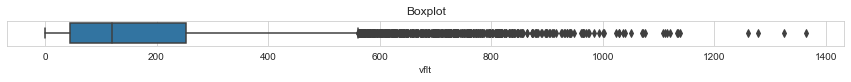

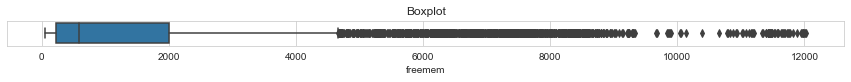

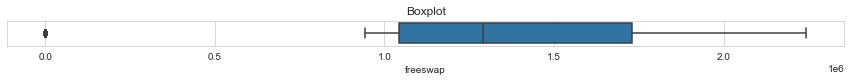

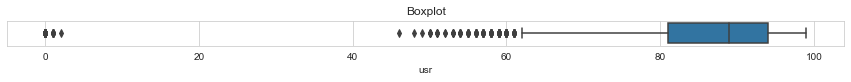

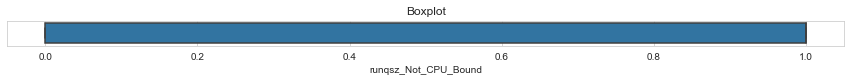

In [585]:
list_=df.columns
for i in range(len(list_)):
    plt.figure(figsize=(15,12))
    plt.subplot(22,1,i+1)
    sns.boxplot(x=df[list_[i]])
    plt.title("Boxplot")
    

Although we can see that outliers exist, we cannot quantify them clearly due to difference in the scales of variables and difference in the magnitude of outliers. Let's try to quantify them below:

In [599]:
#This class is used to style our output in various formats 
class style:
#These are the ANSI escape sequences to set Graphics in our output
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   BLINK = '\033[5m'
   END = '\033[0m'

In [651]:
# Number of outliers
def outlier_check(data,n):
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_range= Q1-(n * IQR)
            upper_range= Q3+(n * IQR)
            print(f"{style.BOLD}{col}{style.END}")
            print("Number of outliers:",data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])
            print("Percentage of outliers:{0:10.3f}".format(((data[(data[col] > upper_range) | (data[col] < lower_range)].shape[0])/data.shape[0])*100),"%\n")

In [601]:
outlier_check(df, 1.5)

lread
Number of outliers: 753
Percentage of outliers:     9.192 %

lwrite
Number of outliers: 1305
Percentage of outliers:    15.930 %

scall
Number of outliers: 108
Percentage of outliers:     1.318 %

sread
Number of outliers: 340
Percentage of outliers:     4.150 %

swrite
Number of outliers: 495
Percentage of outliers:     6.042 %

fork
Number of outliers: 943
Percentage of outliers:    11.511 %

exec
Number of outliers: 710
Percentage of outliers:     8.667 %

rchar
Number of outliers: 453
Percentage of outliers:     5.530 %

wchar
Number of outliers: 817
Percentage of outliers:     9.973 %

pgout
Number of outliers: 988
Percentage of outliers:    12.061 %

ppgout
Number of outliers: 1315
Percentage of outliers:    16.052 %

pgfree
Number of outliers: 1555
Percentage of outliers:    18.982 %

pgscan
Number of outliers: 1744
Percentage of outliers:    21.289 %

atch
Number of outliers: 1209
Percentage of outliers:    14.758 %

pgin
Number of outliers: 789
Percentage of outliers:   

###**Observations:**

*   Outliers are present in almost all the columns. 
*   We need to treat these columns appropriately so that we can build reliable models

### Bivariate analysis

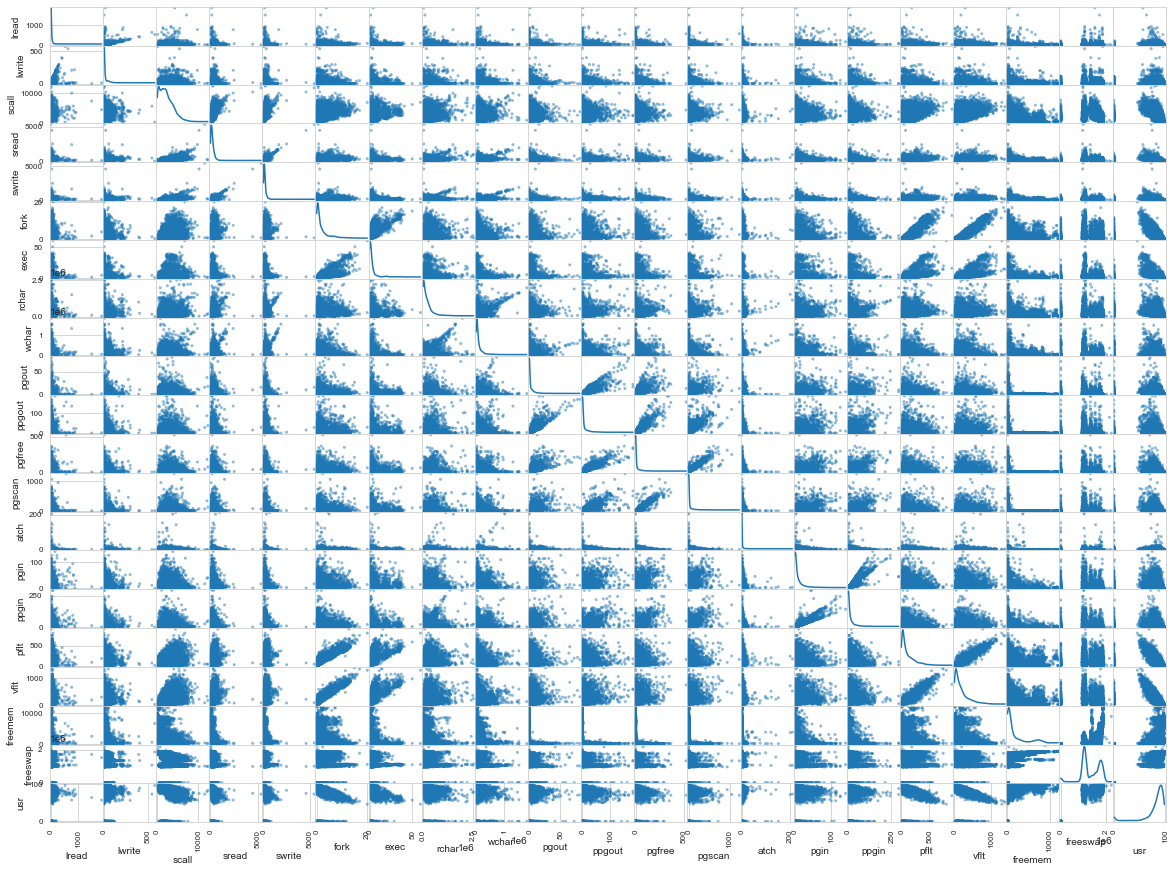

In [602]:
#sns.pairplot(df,kind='kde')
pd.plotting.scatter_matrix(df, diagonal="kde",figsize=(20,15))
plt.show()

<AxesSubplot:>

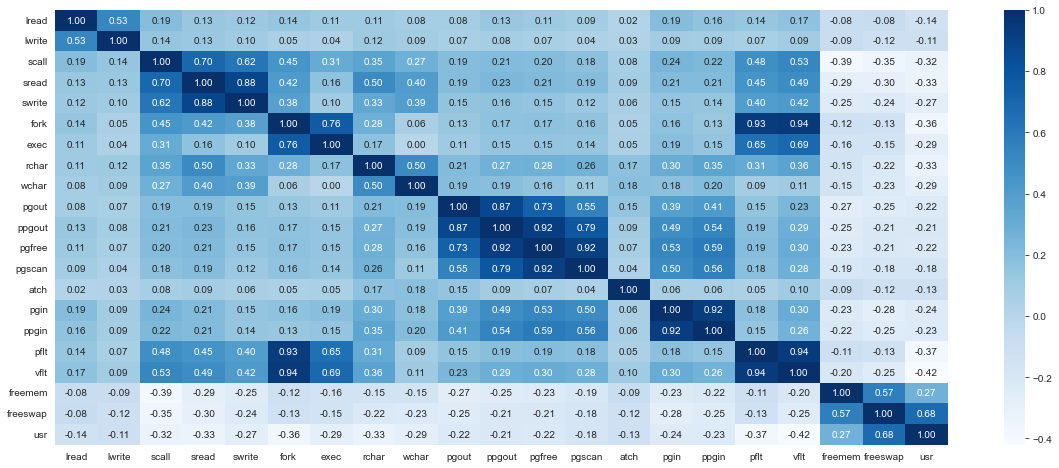

In [604]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f',cmap="Blues")

### Thus there are collinearity issues between the following sets of inputs:
1. sread & swrite
2.fork with execution,pfit & vfit
3.pgout with ppgout & pgfree
4.ppgout with pgfree & pgscan
5.pgfree with pgscan
6.pgin with ppgin
7.pfit with vfit



In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

## Check for null data

In [652]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64


## Imputing null values

In [653]:
#### There is only one item i.e. runsqz which has object data type. For analysis we shall be dropping the variable.
df1=df.drop(columns=['runqsz'])
list1=df1.columns
for i in range(len(list1)):
    medianfiller=lambda x: x.fillna(x.median())
    df1=df1.apply(medianfiller)

In [654]:
df1['runqsz']=df['runqsz']
df=df1
df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
freemem     0
freeswap    0
usr         0
runqsz      0
dtype: int64

#### Thus all null values have been successfully imputed

### Checking for values equalling zero

In [655]:
for column in df.columns:
    print("Numbers of unique values in ",column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values(ascending=False))
    p=round((df[df[column]==0].shape[0]/df.shape[0])*100,2)
    #print("\n")
    print("Out of the total data in {}, {}% value are 0".format(column,p))
    print("\n")

Numbers of unique values in  LREAD :  235
1      1050
2       732
0       675
3       539
4       408
       ... 
226       1
147       1
556       1
817       1
129       1
Name: lread, Length: 235, dtype: int64
Out of the total data in lread, 8.24% value are 0


Numbers of unique values in  LWRITE :  189
0      2684
1      1529
2       615
3       284
4       253
       ... 
179       1
404       1
298       1
229       1
267       1
Name: lwrite, Length: 189, dtype: int64
Out of the total data in lwrite, 32.76% value are 0


Numbers of unique values in  SCALL :  4115
158     10
220     10
419      9
160      9
230      9
        ..
1999     1
3848     1
6825     1
4527     1
5180     1
Name: scall, Length: 4115, dtype: int64
Out of the total data in scall, 0.0% value are 0


Numbers of unique values in  SREAD :  794
16      43
10      41
43      40
12      38
95      37
        ..
990      1
717      1
1077     1
594      1
674      1
Name: sread, Length: 794, dtype: int64
Out of th

Out of the total data in pgout, 59.55% value are 0
Out of the total data in ppgout, 59.55% value are 0
Out of the total data in pgfree, 59.44% value are 0
Out of the total data in pgscan, 78.71% value are 0
Out of the total data in atch, 55.85% value are 0
However, it is not clear whether these data are actually true value or anomalies and hence we chose to retain them at this stage

## Checking duplicate values in data

In [656]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(8192, 22)


*******Thus there are no duplicate data

### treatment of outlier

In [657]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [658]:
for column in df.columns:
    if df[column].dtype != "object":
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

#### Encode the data (having string values) for Modelling

#### Since 'runsqz' is a variable of 'object' type, we need to create a new variable through dummies

In [659]:
df=pd.get_dummies(df,columns=['runqsz'], drop_first=True)

#### Split the data into train and test (70:30)

In [660]:
x=df.drop(columns=["usr"]) #setting the independent variable
y=df['usr'] #setting the dependent variable

In [661]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

### Apply Linear regression using scikit learn

In [662]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [637]:
regression_model.coef_

array([-6.34815062e-02,  4.81612871e-02, -6.63828011e-04,  3.08252103e-04,
       -5.42182230e-03,  2.93127272e-02, -3.21166484e-01, -5.16684176e-06,
       -5.40287524e-06, -3.68819064e-01, -7.65976821e-02,  8.44841447e-02,
        7.77156117e-16,  6.27574157e-01,  1.99879077e-02, -6.73338398e-02,
       -3.36028294e-02, -5.46366880e-03, -4.58467188e-04,  8.83184026e-06,
        1.61529785e+00])

In [638]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, round(regression_model.coef_[idx],6)))

The coefficient for lread is -0.063482
The coefficient for lwrite is 0.048161
The coefficient for scall is -0.000664
The coefficient for sread is 0.000308
The coefficient for swrite is -0.005422
The coefficient for fork is 0.029313
The coefficient for exec is -0.321166
The coefficient for rchar is -5e-06
The coefficient for wchar is -5e-06
The coefficient for pgout is -0.368819
The coefficient for ppgout is -0.076598
The coefficient for pgfree is 0.084484
The coefficient for pgscan is 0.0
The coefficient for atch is 0.627574
The coefficient for pgin is 0.019988
The coefficient for ppgin is -0.067334
The coefficient for pflt is -0.033603
The coefficient for vflt is -0.005464
The coefficient for freemem is -0.000458
The coefficient for freeswap is 9e-06
The coefficient for runqsz_Not_CPU_Bound is 1.615298


In [663]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 84.12174079533517


In [664]:
# Framing the linear regression equation
print("usr= %.2f + " %intercept, end="") # end=" " ensures that subsequent lines are printed in continuum
for idx, col_name in enumerate(x_train.columns):
    print("{} * ({})".format(col_name, round(regression_model.coef_[idx],6)), end="")

usr= 84.12 + lread * (-0.063482)lwrite * (0.048161)scall * (-0.000664)sread * (0.000308)swrite * (-0.005422)fork * (0.029313)exec * (-0.321166)rchar * (-5e-06)wchar * (-5e-06)pgout * (-0.368819)ppgout * (-0.076598)pgfree * (0.084484)pgscan * (0.0)atch * (0.627574)pgin * (0.019988)ppgin * (-0.067334)pflt * (-0.033603)vflt * (-0.005464)freemem * (-0.000458)freeswap * (9e-06)runqsz_Not_CPU_Bound * (1.615298)

In [665]:
# R square on training data
regression_model.score(x_train, y_train)

0.796108610127457

79.61 % of the variation in the usr is explained by the predictors in the model for train set

In [666]:
# R square on testing data
regression_model.score(x_test, y_test)

0.767731859793596

76.77% of the variation in the usr is explained by the predictors in the model for train set. Since, the regression score is almost equal between the train and test data, it seems there is no overfitting issues.

In [667]:
#RMSE on Training data
predicted_train=regression_model.predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

4.419536092979902

In [644]:
#RMSE on Testing data
predicted_test=regression_model.predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

4.652295704192812

### Perform checks for significant variables using appropriate method from statsmodel. 

In [668]:
x_train=sm.add_constant(x_train)# This adds the constant term beta0 to the Simple Linear Regression as against linear regression from sklearn library which takes care of the same
x_test=sm.add_constant(x_test)
model=sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1115.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:34:20   Log-Likelihood:                -16657.
No. Observations:                5734   AIC:                         3.336e+04
Df Residuals:                    5713   BIC:                         3.350e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.1217      0.316    266.106      0.000      83.502      84.741
lread                   -0.0635      0.009     -7.071      0.000      -0.081      -0.046
lwrite                   0.0482      0.013      3.671      0.000       0.022       0.074
scall                   -0.0007   6.28e-05    -10.566      0.000      -0.001      -0.001
sread                    0.0003      0.001      0.305      0.760      -0.002       0.002
swrite                  -0.0054      0.001     -3.777      0.000      -0.008      -0.003
fork                     0.0293      0.132      0.222      0.824      -0.229       0.288
exec                    -0.3212      0.052     -6.220      0.000      -0.422      -0.220
rchar                -5.167e-06   4.88e-07    -10.598      0.000   -6.12e-06   -4.21e-06
wchar                -5.403e-06   1.03e-06     -5.232      0.000   -7.43e-06   -3.38e-06
pgout                   -0.3688      0.090     -4.098      0.000      -0.545      -0.192
ppgout                  -0.0766      0.079     -0.973      0.330      -0.231       0.078
pgfree                   0.0845      0.048      1.769      0.077      -0.009       0.178
pgscan                4.285e-14    1.8e-16    238.643      0.000    4.25e-14    4.32e-14
atch                     0.6276      0.143      4.394      0.000       0.348       0.908
pgin                     0.0200      0.028      0.703      0.482      -0.036       0.076
ppgin                   -0.0673      0.020     -3.415      0.001      -0.106      -0.029
pflt                    -0.0336      0.002    -16.957      0.000      -0.037      -0.030
vflt                    -0.0055      0.001     -3.830      0.000      -0.008      -0.003
freemem                 -0.0005   5.07e-05     -9.038      0.000      -0.001      -0.000
freeswap              8.832e-06    1.9e-07     46.472      0.000    8.46e-06     9.2e-06
runqsz_Not_CPU_Bound     1.6153      0.126     12.819      0.000       1.368       1.862
==============================================================================
Omnibus:                     1103.645   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2372.553
Skew:                          -1.119   Prob(JB):                         0.00
Kurtosis:                       5.219   Cond. No.                     6.66e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.58e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning

#### In case of certain indenpent variable such as Iwrite,sread,swrite & pgscan the p-value is larger than the significance level(0.05). Hence, they may be equal to zero. we may drop them 

In [669]:
list_=[ 'lwrite', 'sread','fork','ppgout','pgin', 'swrite', 'pgscan']
x_train_=x_train
for i in list_ :
    x_train_=x_train_.drop([i], axis=1)
    olsmod_=sm.OLS(y_train,x_train_)
    olsres_=olsmod_.fit()
    y_pred=olsres_.fittedvalues.values
    rmse_train=np.sqrt(mean_squared_error(y_train,y_pred))

    print("R-squared( after dropping {}) :".format(i), np.round((olsres_.rsquared),3))
    print("Adjusted R-squared ( after dropping {}) :".format(i), np.round((olsres_.rsquared_adj),3))
    print("Root Mean squared error of the training data ( after dropping {}) :".format(i), np.round(rmse_train,3))
    print(" ")

R-squared( after dropping lwrite) : 0.796
Adjusted R-squared ( after dropping lwrite) : 0.795
Root Mean squared error of the training data ( after dropping lwrite) : 4.425
 
R-squared( after dropping sread) : 0.796
Adjusted R-squared ( after dropping sread) : 0.795
Root Mean squared error of the training data ( after dropping sread) : 4.425
 
R-squared( after dropping fork) : 0.796
Adjusted R-squared ( after dropping fork) : 0.795
Root Mean squared error of the training data ( after dropping fork) : 4.425
 
R-squared( after dropping ppgout) : 0.796
Adjusted R-squared ( after dropping ppgout) : 0.795
Root Mean squared error of the training data ( after dropping ppgout) : 4.425
 
R-squared( after dropping pgin) : 0.796
Adjusted R-squared ( after dropping pgin) : 0.795
Root Mean squared error of the training data ( after dropping pgin) : 4.425
 
R-squared( after dropping swrite) : 0.795
Adjusted R-squared ( after dropping swrite) : 0.794
Root Mean squared error of the training data ( afte

#### Thus we can remove the independent variables-Iwrite,sread,swrite & pgscan without compromising much on the regression model efficiency

In [670]:
#Building the model after dropping redundant predictors.
x_train=x_train.drop(['lwrite', 'sread','fork','ppgout','pgin', 'swrite', 'pgscan'], axis=1)
#x_train=sm.add_constant(x_train)# This adds the constant term beta0 to the Simple Linear Regression as against linear regression from sklearn library which takes care of the same
#x_test=sm.add_constant(x_test)
model=sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1582.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:34:58   Log-Likelihood:                -16676.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5719   BIC:                         3.348e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   84.0101      0.309    272.113      0.000      83.405      84.615
lread                   -0.0350      0.004     -7.878      0.000      -0.044      -0.026
scall                   -0.0008   4.87e-05    -17.068      0.000      -0.001      -0.001
exec                    -0.2511      0.047     -5.380      0.000      -0.343      -0.160
rchar                -5.153e-06   4.38e-07    -11.759      0.000   -6.01e-06   -4.29e-06
wchar                -6.665e-06   9.82e-07     -6.788      0.000   -8.59e-06   -4.74e-06
pgout                   -0.4157      0.068     -6.117      0.000      -0.549      -0.282
pgfree                   0.0417      0.029      1.425      0.154      -0.016       0.099
atch                     0.6531      0.143      4.572      0.000       0.373       0.933
ppgin                   -0.0573      0.007     -8.479      0.000      -0.071      -0.044
pflt                    -0.0349      0.002    -19.106      0.000      -0.038      -0.031
vflt                    -0.0064      0.001     -5.176      0.000      -0.009      -0.004
freemem                 -0.0004   5.05e-05     -8.511      0.000      -0.001      -0.000
freeswap              8.851e-06   1.88e-07     47.068      0.000    8.48e-06    9.22e-06
runqsz_Not_CPU_Bound     1.6480      0.126     13.084      0.000       1.401       1.895
==============================================================================
Omnibus:                     1071.255   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2256.388
Skew:                          -1.097   Prob(JB):                         0.00
Kurtosis:                       5.152   Cond. No.                     7.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [671]:
### After the new model, a new variable "pgfree" seems redundant now. Rechecking the model by dropping the same.

x_train=x_train.drop(['pgfree'], axis=1)
x_train=sm.add_constant(x_train)# This adds the constant term beta0 to the Simple Linear Regression as against linear regression from sklearn library which takes care of the same
x_test=sm.add_constant(x_test)
model=sm.OLS(y_train,x_train).fit()
model.summary()
y_pred=olsres_.fittedvalues.values
rmse_train=np.sqrt(mean_squared_error(y_train,y_pred))

print("Root Mean squared error of the training data  after dropping pgfree is  :", np.round(rmse_train,3))
print("\n")
print(model.summary())

Root Mean squared error of the training data  after dropping pgfree is  : 4.434


                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1703.
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        19:36:12   Log-Likelihood:                -16677.
No. Observations:                5734   AIC:                         3.338e+04
Df Residuals:                    5720   BIC:                         3.348e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Checking for multicollinearity among the independent variables: 


In [672]:
#checking VIF without dropping variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.Series(
    [variance_inflation_factor(x_train.values, i ) for i in range (x_train.shape[1])],
    index=x_train.columns
    )
vif.sort_values(ascending=False)

const                   27.722799
vflt                    11.763364
pflt                    10.097550
exec                     2.631461
pgout                    2.050267
freemem                  1.924054
atch                     1.864981
freeswap                 1.790236
scall                    1.768730
rchar                    1.713982
ppgin                    1.598833
wchar                    1.424206
lread                    1.305524
runqsz_Not_CPU_Bound     1.149036
dtype: float64

### Thus it is observed the following independent variables might be highly correlated-'vflt', 'ppgout', 'fork', 'pflt', 'pgfree', 'ppgin', 'pgin','pgout'. It can be checked whether they can be dropped without affecting the efficiency of the regression model.

In [673]:
list__=[ 'vflt',  'pflt']
x_train__=x_train
for i in list__ :
    x_train__=x_train__.drop([i], axis=1)
    olsmod__=sm.OLS(y_train,x_train__)
    olsres__=olsmod__.fit()
    y_pred_=olsres__.fittedvalues.values
    rmse_train_=np.sqrt(mean_squared_error(y_train,y_pred_))

    print("R-squared( after dropping {}) :".format(i), np.round((olsres__.rsquared),3))
    print("Adjusted R-squared ( after dropping {}) :".format(i), np.round((olsres__.rsquared_adj),3))
    print("Root Mean squared error of the training data ( after dropping {}) :".format(i), np.round(rmse_train_,3))
    print(" ")

R-squared( after dropping vflt) : 0.794
Adjusted R-squared ( after dropping vflt) : 0.793
Root Mean squared error of the training data ( after dropping vflt) : 4.445
 
R-squared( after dropping pflt) : 0.722
Adjusted R-squared ( after dropping pflt) : 0.721
Root Mean squared error of the training data ( after dropping pflt) : 5.165
 


In [674]:
#checking VIF without dropping variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.Series(
    [variance_inflation_factor(x_train__.values, i ) for i in range (x_train__.shape[1])],
    index=x_train__.columns
    )
vif.sort_values(ascending=False)

const                   27.299680
pgout                    2.039174
freemem                  1.918297
atch                     1.858504
freeswap                 1.739539
scall                    1.644449
rchar                    1.627418
ppgin                    1.479962
exec                     1.441908
wchar                    1.391350
lread                    1.274904
runqsz_Not_CPU_Bound     1.148271
dtype: float64

Thus, the multicollinearity problems will be  addressed to a great extent if we drop these variables.However, it seems dropping 'pflt' affects the regression performance.Hence, we chose not to drop this in the final model.

#### Check for normality in residuals

In [675]:
y_train_pred= pd.DataFrame()
y_train_pred["Actual Values"]=y_train.values.flatten() # actual values
y_train_pred["Fitted Values"]=model.fittedvalues.values #predicted values
y_train_pred["Residuals"]=model.resid.values # residuals

y_train_pred.head()

,Actual Values,Fitted Values,Residuals
0,91.0,91.303090,-0.303090
1,94.0,91.747852,2.252148
2,61.5,75.165928,-13.665928
3,83.0,80.507838,2.492162
4,94.0,97.774414,-3.774414


Text(0.5, 1.0, 'Normality of residuals')

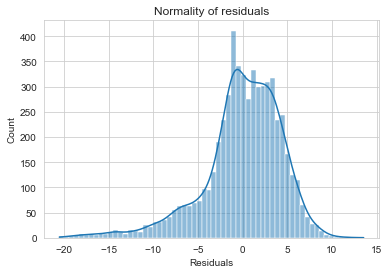

In [676]:
### Next is the check for normality of the residuals
sns.histplot(y_train_pred["Residuals"], kde=True)
plt.title("Normality of residuals")

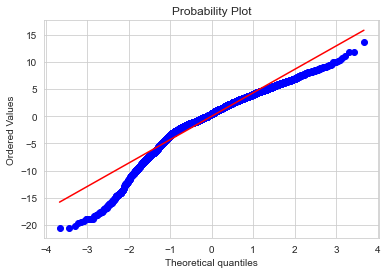

In [677]:
### Checking QQ plot
import pylab
import scipy.stats as stats

stats.probplot(y_train_pred["Residuals"], dist='norm', plot=pylab)
plt.show()

### Since majority of the points are on the QQ plot, the residuals seems to be normally distributed

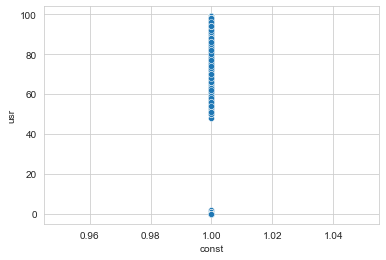

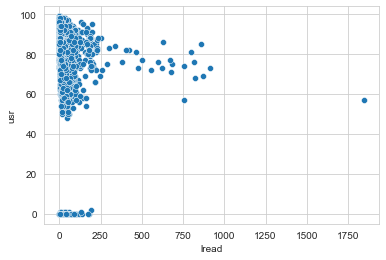

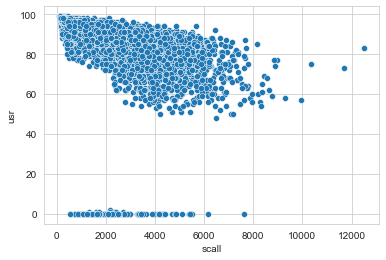

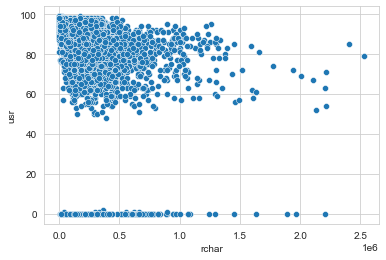

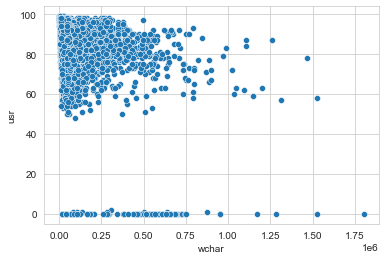

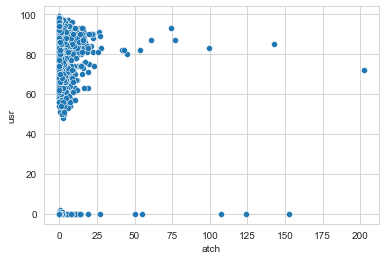

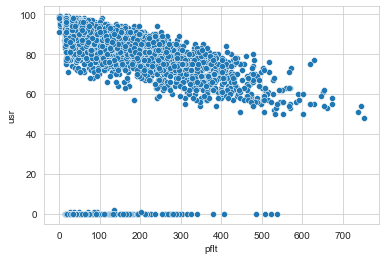

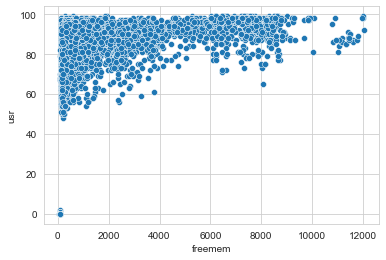

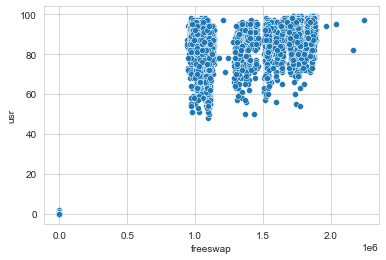

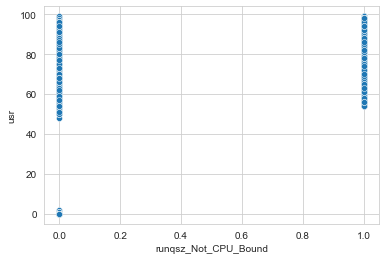

In [219]:
for i in x_train.columns:
    sns.scatterplot(x_train[i],y_train)
    plt.xlabel=("y_train")
    plt.ylabel=(i)
    #plt.title("Fitted vs Residual plot")
    plt.show()

### Checking linearity between dependent and independent variable

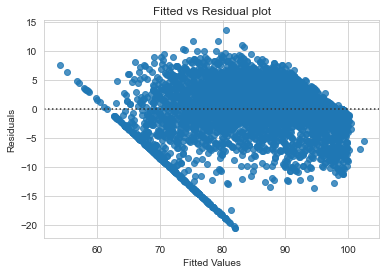

In [680]:
## plot the fitted values with the residuals
sns.set_style("whitegrid")
sns.residplot( data=y_train_pred, x="Fitted Values", y="Residuals")
plt.xlabel=("Fitted Values")
plt.ylabel=("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### It seems the residuals are equally distributed around the predicted values

In [681]:
## Test for homoskedasticity- goldfeldquandt test
## null-Residuals are homoskedastic
## Alternate -residuals are not homoskedastic

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name=["F statistic", "p-value"]
test= sms.het_goldfeldquandt(y_train_pred["Residuals"],x_train)
lzip(name,test)

[('F statistic', 1.1014513252455198), ('p-value', 0.00494130644242638)]

Thus the data is homoskedastic.

### Final model

In [ ]:
'lwrite', 'sread','fork','ppgout','pgin', 'swrite', 'pgscan'

In [161]:
#Building the model after dropping redundant predictors.
x_train=x_train.drop(['vflt', 'ppgout', 'fork',  'pgfree', 'ppgin', 'pgin','pgout'], axis=1)
model=sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1100.
Date:                Wed, 04 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:35:23   Log-Likelihood:                -21860.
No. Observations:                5734   AIC:                         4.374e+04
Df Residuals:                    5724   BIC:                         4.381e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.0434      0.708     65.076      0.000      44.656      47.430
lread                   -0.0180      0.003     -6.612      0.000      -0.023      -0.013
scall                    0.0011      0.000      9.238      0.000       0.001       0.001
rchar                -4.015e-06   7.38e-07     -5.441      0.000   -5.46e-06   -2.57e-06
wchar                -1.314e-05   1.22e-06    -10.747      0.000   -1.55e-05   -1.07e-05
atch                    -0.0647      0.026     -2.448      0.014      -0.116      -0.013
pflt                    -0.0477      0.001    -32.270      0.000      -0.051      -0.045
freemem                 -0.0015   7.48e-05    -20.265      0.000      -0.002      -0.001
freeswap               3.15e-05   4.38e-07     71.908      0.000    3.06e-05    3.24e-05
runqsz_Not_CPU_Bound     7.4895      0.305     24.574      0.000       6.892       8.087
==============================================================================
Omnibus:                     1507.815   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4828.941
Skew:                          -1.329   Prob(JB):                         0.00
Kurtosis:                       6.626   Cond. No.                     7.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
# Checking Variance Influence Factor of each of the co-efficients in the final equation after dropping variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.Series(
    [variance_inflation_factor(x_train.values, i ) for i in range (x_train.shape[1])],
    index=x_train.columns
    )
vif.sort_values(ascending=False)


const                   23.891520
scall                    1.689397
freemem                  1.620354
freeswap                 1.605209
rchar                    1.527674
wchar                    1.392963
pflt                     1.379625
runqsz_Not_CPU_Bound     1.104267
atch                     1.045186
lread                    1.040034
dtype: float64

In [187]:
# Framing the final linear regression equation
print("usr=", end=" ")
for idx, col_name in enumerate(x_train.columns):
    if idx==0:
        print(" {}+ ".format(round(model.params[idx],6)), end="")
    elif idx==9 :
        print(" {} * ({}) ".format(col_name, round(model.params[idx],6)), end="")
    else :
        print(" {} * ({}) +".format(col_name, round(model.params[idx],6)), end="")

usr=  46.043399+  lread * (-0.017993) + scall * (0.001058) + rchar * (-4e-06) + wchar * (-1.3e-05) + atch * (-0.064688) + pflt * (-0.047718) + freemem * (-0.001517) + freeswap * (3.1e-05) + runqsz_Not_CPU_Bound * (7.489502) 

### Basis on these predictions, what are the business insights and recommendations. 


### Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

# Problem 2: Logistic Regression, LDA and CART


You are a statistician at the Republic of Indonesia Ministry of Health and you are provided with a data of 1473 females collected from a Contraceptive Prevalence Survey. The samples are married women who were either not pregnant or do not know if they were at the time of the survey.The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.

Data Dictionary:
1. Wife's age (numerical)
2. Wife's education (categorical) 1=uneducated, 2, 3, 4=tertiary
3. Husband's education (categorical) 1=uneducated, 2, 3, 4=tertiary
4. Number of children ever born (numerical)
5. Wife's religion (binary) Non-Scientology, Scientology
6. Wife's now working? (binary) Yes, No
7. Husband's occupation (categorical) 1, 2, 3, 4(random)
8. Standard-of-living index (categorical) 1=verlow, 2, 3, 4=high
9. Media exposure (binary) Good, Not good
10. Contraceptive method used (class attribute) No,Yes


In [438]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [439]:
adult_data=pd.read_excel(r"C:\Users\Admin\Downloads\Contraceptive_method_dataset.xlsx")

In [447]:
adult_data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [468]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   object 
 2   Husband_education          1393 non-null   object 
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   object 
 5   Wife_Working               1393 non-null   object 
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   object 
 8   Media_exposure             1393 non-null   object 
 9   Contraceptive_method_used  1393 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 152.0+ KB


Inference : 
    Most of the columns in the data are string  in nature (  'object'type).
    The Wife_age,Husband_Occupation and No_of_children_born columns are numeric columns ( 'int64' or 'float64' type).
    
    

In [450]:
adult_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1326.0,NaN,NaN,NaN,32.557315,8.289259,16.0,26.0,32.0,39.0,49.0
Wife_ education,1393,4,Tertiary,515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1393,4,Tertiary,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1372.0,NaN,NaN,NaN,3.290816,2.399697,0.0,1.0,3.0,5.0,16.0
Wife_religion,1393,2,Scientology,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1393,2,No,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1393.0,NaN,NaN,NaN,2.174444,0.85459,1.0,1.0,2.0,3.0,4.0
Standard_of_living_index,1393,4,Very High,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1393,2,Exposed,1284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1393,2,Yes,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for duplicate data

In [451]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 0
(1393, 10)


In [452]:
#dropping duplicate data
adult_data.drop_duplicates(inplace=True) 
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 0
(1393, 10)


### checking for null values

In [454]:
adult_data.isnull().sum()

Wife_age                     67
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

#### Thus there are 67 and 21 null data in the Wife-age and No_of_children_born variable.

### Check for outliers in the data

<AxesSubplot:>

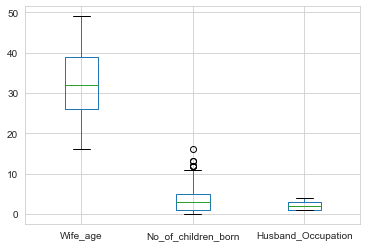

In [453]:
adult_data.boxplot()

There seems to be certain outliers in the No_of_children

In [457]:
adult_data['No_of_children_born'].value_counts()

2.0     258
1.0     257
3.0     232
4.0     180
5.0     126
0.0      92
6.0      88
7.0      49
8.0      45
9.0      16
10.0     11
11.0     11
12.0      4
13.0      2
16.0      1
Name: No_of_children_born, dtype: int64

### Thus 4 couples having 12 children, 2 couples having 13 children and 1 couple having 16 children are outlier.

In [459]:
# filling missing values using median
for column in adult.columns:
    if adult_data[column].dtype != 'object':
        median = adult_data[column].median()
        adult_data[column] = adult_data[column].fillna(value=median)    
        
adult_data.isnull().sum()  

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

In [462]:
for column in adult.columns:
    if adult_data[column].dtype != 'object':
        print(column)

Wife_age
No_of_children_born
Husband_Occupation


# **Univariate Analysis**

In [464]:
numerical = ['Wife_age', 'No_of_children_born','Husband_Occupation']
categorical = ['Wife_ education', 'Husband_education',
       'Wife_religion', 'Wife_Working',
        'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used']

### Geting unique counts of all Objects

In [477]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        
        print(feature)
        print(adult_data[feature].value_counts())
        
        
        print('\n')
        

Wife_ education
Tertiary      515
Secondary     398
Primary       330
Uneducated    150
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      827
Secondary     347
Primary       175
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1186
Non-Scientology     207
Name: Wife_religion, dtype: int64


Wife_Working
No     1043
Yes     350
Name: Wife_Working, dtype: int64


Standard_of_living_index
Very High    618
High         419
Low          227
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1284
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    779
No     614
Name: Contraceptive_method_used, dtype: int64




### Bi-variate analysis

In [117]:
### Checking correlations between the numerical variables
adult[['Wife_age','No_of_children_born']].corr()

,Wife_age,No_of_children_born
Wife_age,1.000000,0.526923
No_of_children_born,0.526923,1.000000


In [91]:
### Conclusion : Thus there seems to be somewhat correlation between wife's age and No_of_children_born

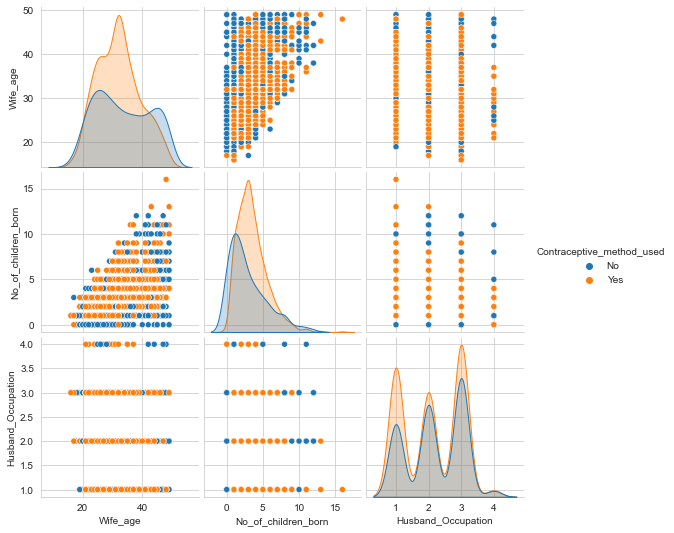

In [92]:
# Pairplot using sns
sns.pairplot(adult ,diag_kind='kde' ,hue='Contraceptive_method_used');

<AxesSubplot:>

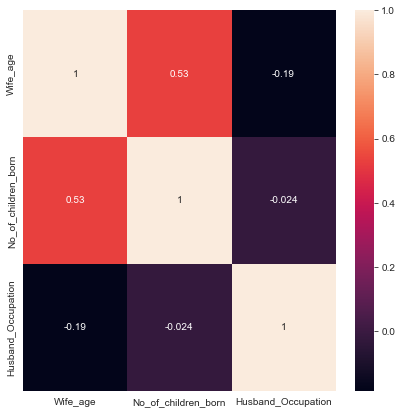

In [483]:
plt.figure(figsize=(7,7))
sns.heatmap(adult_data.corr(),annot=True)

## Conclusion : No significant correlation between any two of the independent numerial variables.

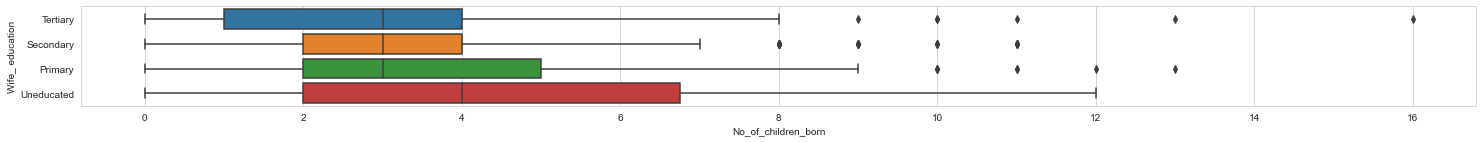

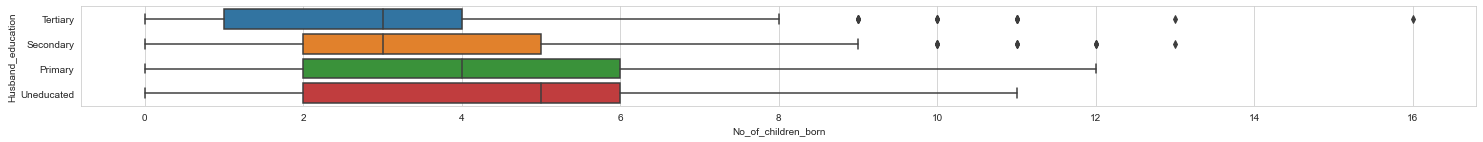

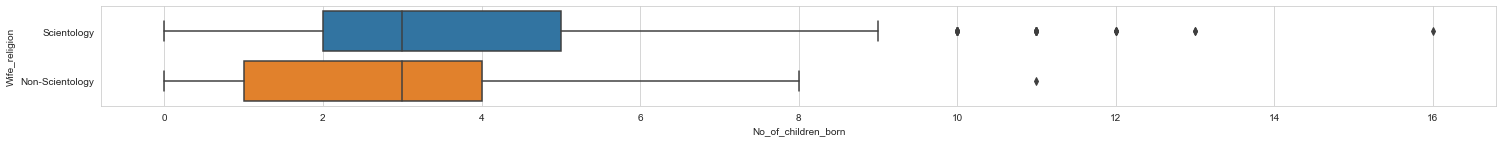

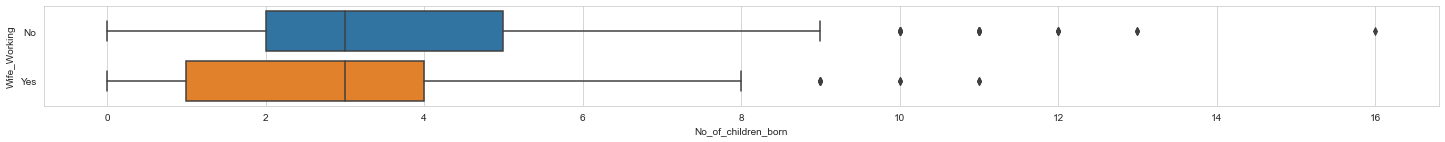

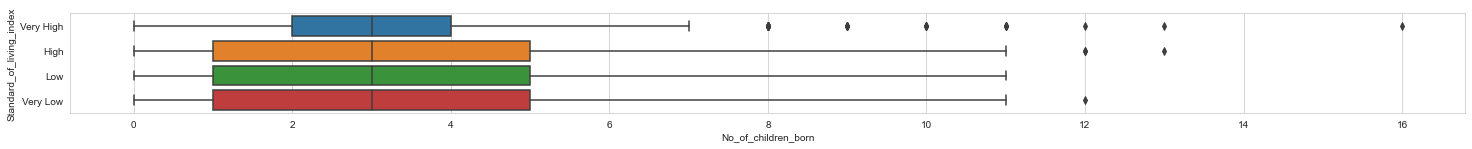

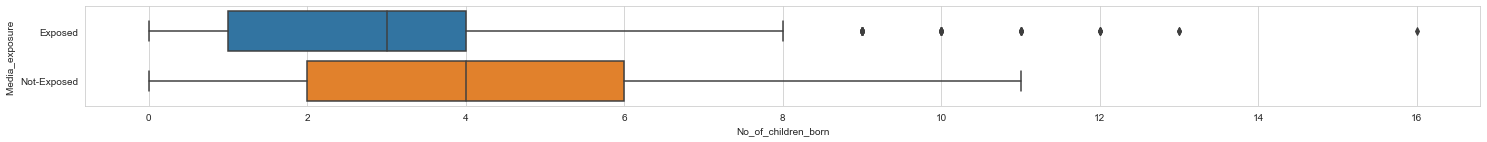

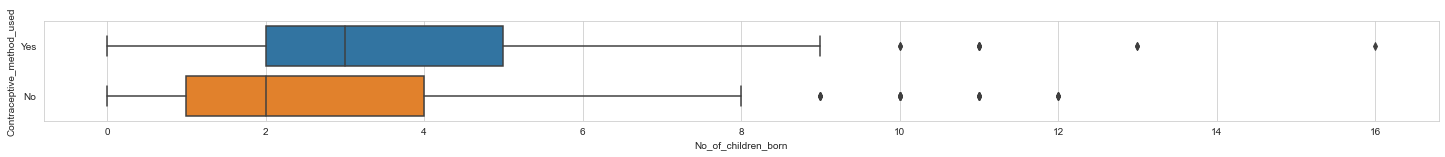

In [491]:
x = categorical
y = 'No_of_children_born'
#

for i in x:
    order=adult_data[i].value_counts().index
    plt.figure(figsize= (25,15))
    plt.subplot(7,1,1)
    sns.boxplot(y=adult_data[i], x=adult_data[y], data=adult_data, order=order)


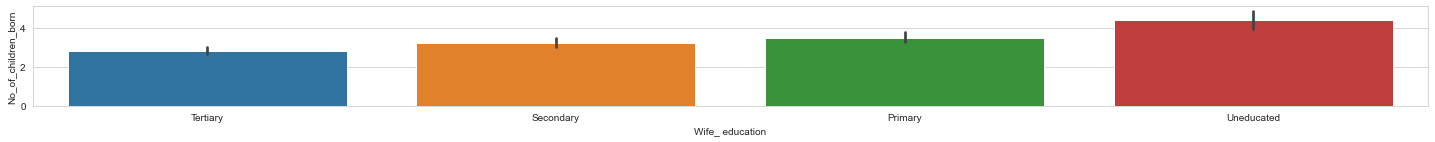

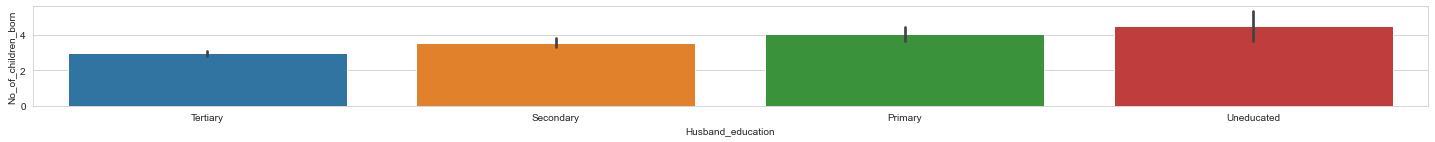

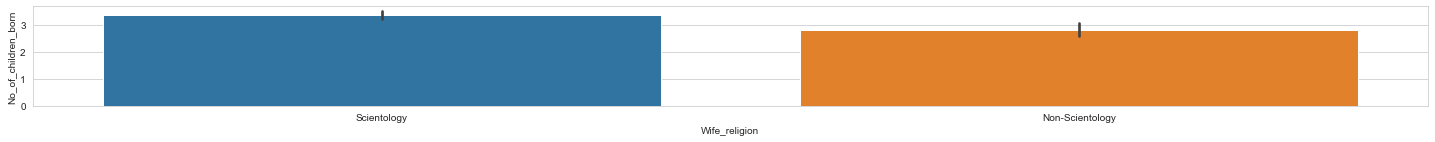

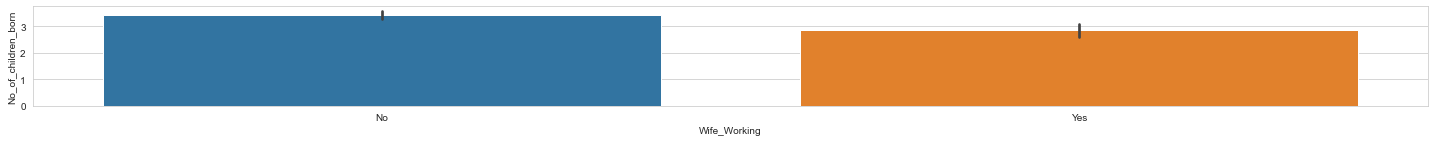

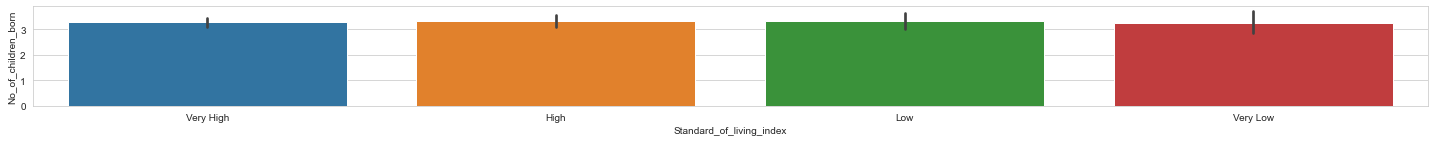

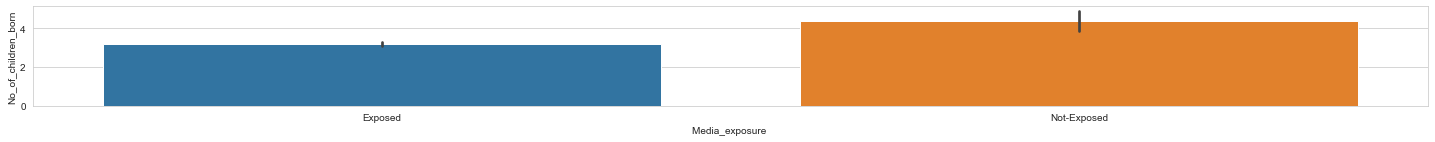

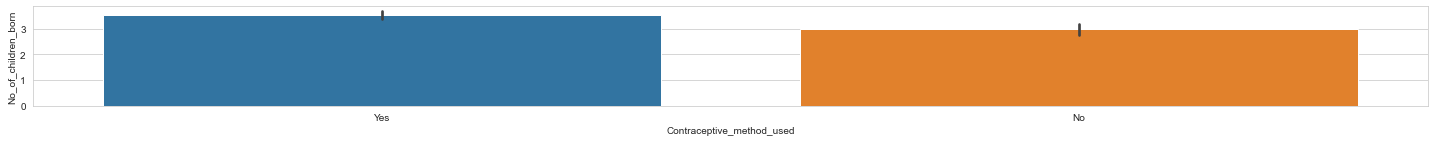

In [490]:
x = categorical
y = 'No_of_children_born'


for i in x:
    order=adult_data[i].value_counts().index
    plt.figure(figsize= (25,15))
    plt.subplot(7,1,1)
    sns.barplot(x=adult_data[i], y=adult_data[y], data=adult_data, order=order)


In [492]:
adult_data.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

# Multivariate analysis

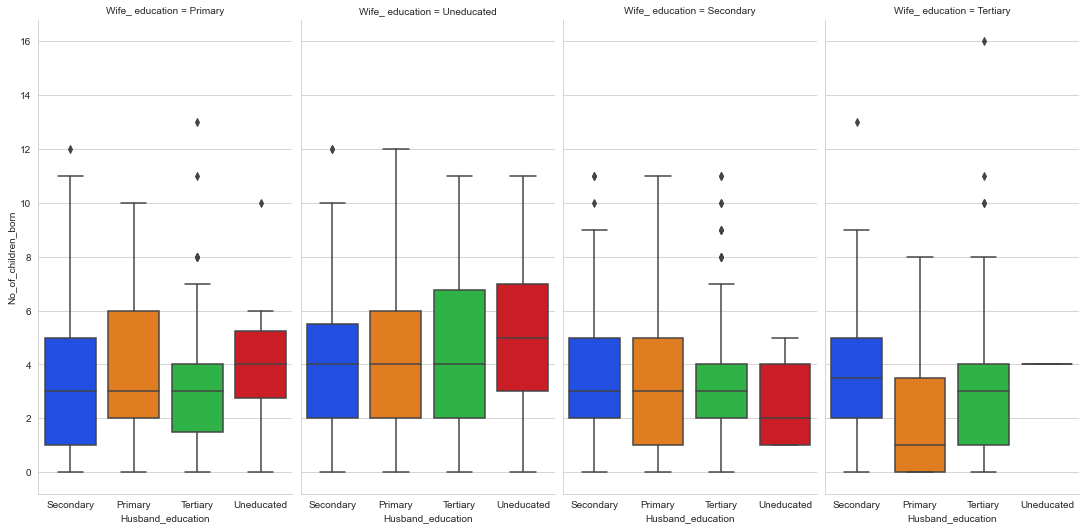

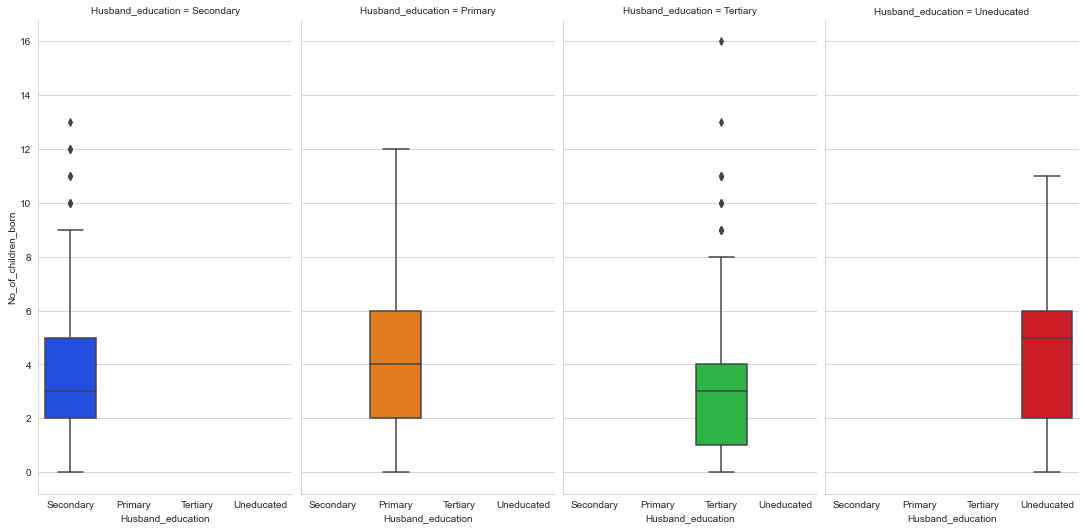

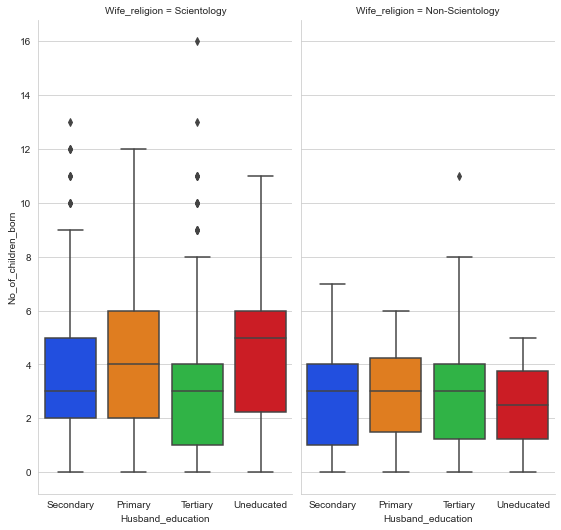

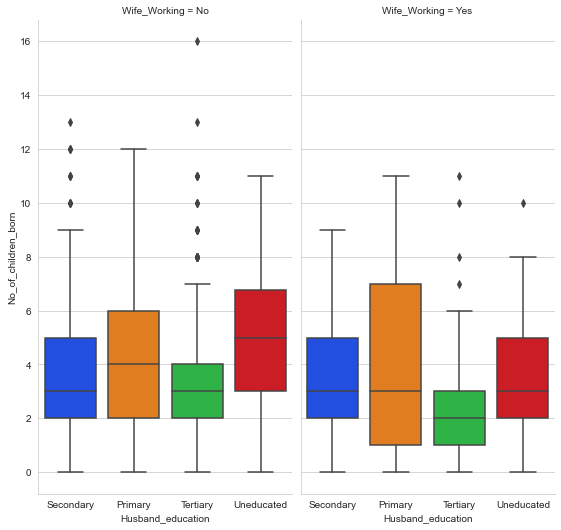

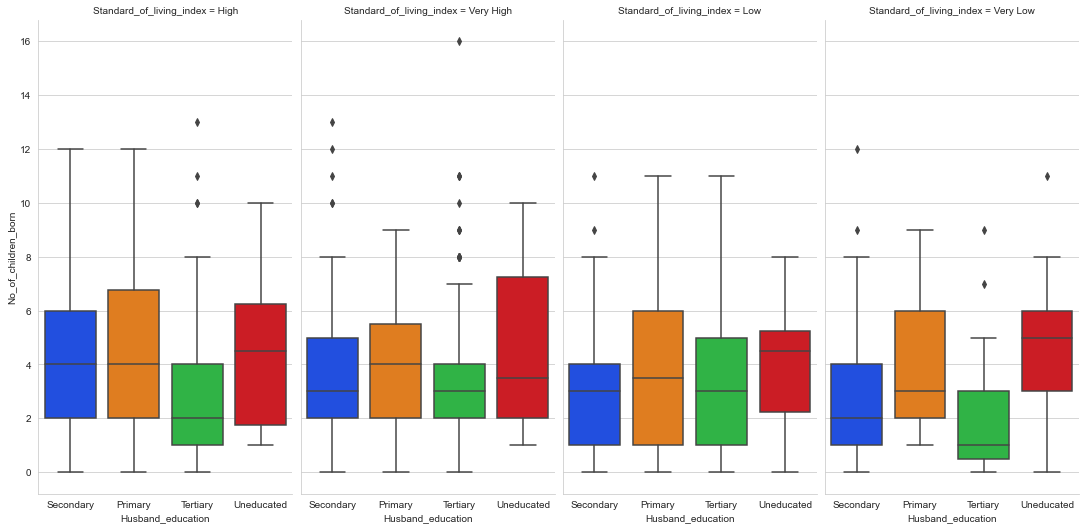

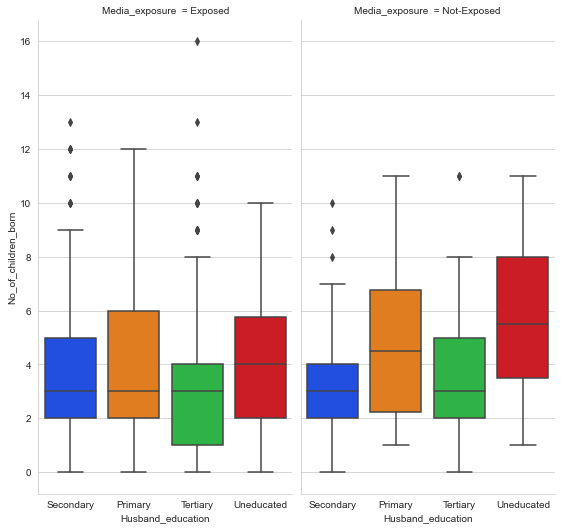

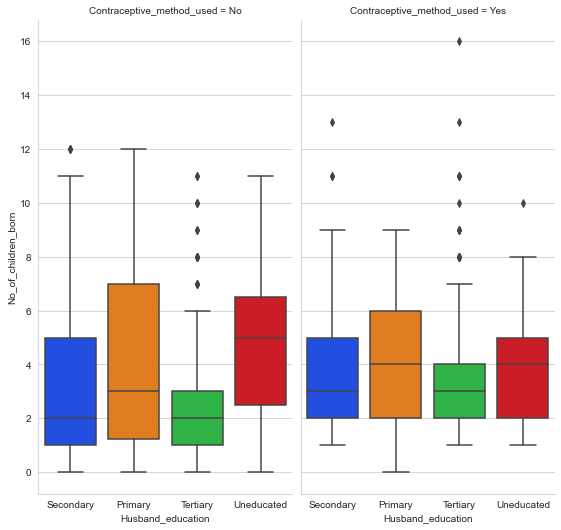

In [495]:
for i in categorical :
    
    f = sns.factorplot(x= 'Husband_education', y = 'No_of_children_born', col= i, col_wrap=4, data=adult_data, kind="box",ci= False,palette='bright',aspect=1, )
    f.fig.set_size_inches(15,8)

conclusion :
1. Couples where the wife is uneducated is having highest numbers of kids across various education level of husband.
2. Couples having higher numbers of children when wife's religion is scientology irrespective of the level of education of the husband.
3.Couples where the wife is working have lesser numbers of children irrespective of husband's level of education.
4.Except when the husband is uneducated, couples with standard of living very low are having lower numbers of children considering couples with different standards of living.
5.Couples without exposre to media is most likely to have higher number of children as compared to those with exposure irrespective of the level of education of the husband.
6.Couples who used contraceptive method in general have higher numbers of kids orrespective of the level of husband's education

            
    

### Encode the data (having string values) for Modelling

### Converting all objects to categorical codes

In [496]:
## We are coding up the 'Wife_education' variable in an ordinal manner

adult_data['Wife_ education']=np.where(adult_data['Wife_ education'] =='Uneducated', '1', adult_data['Wife_ education'])
adult_data['Wife_ education']=np.where(adult_data['Wife_ education'] =='Primary', '2', adult_data['Wife_ education'])
adult_data['Wife_ education']=np.where(adult_data['Wife_ education'] =='Secondary', '3', adult_data['Wife_ education'])
adult_data['Wife_ education']=np.where(adult_data['Wife_ education'] =='Tertiary', '4', adult_data['Wife_ education'])

In [497]:
## We are coding up the 'Husband_education' variable in an ordinal manner

adult_data['Husband_education']=np.where(adult_data['Husband_education'] =='Uneducated', '1', adult_data['Husband_education'])
adult_data['Husband_education']=np.where(adult_data['Husband_education'] =='Primary', '2', adult_data['Husband_education'])
adult_data['Husband_education']=np.where(adult_data['Husband_education'] =='Secondary', '3', adult_data['Husband_education'])
adult_data['Husband_education']=np.where(adult_data['Husband_education'] =='Tertiary', '4', adult_data['Husband_education'])

In [498]:
## We are coding up the 'Standard_of_living_index' variable in an ordinal manner

adult_data['Standard_of_living_index']=np.where(adult_data['Standard_of_living_index'] =='Very Low', '1', adult_data['Standard_of_living_index'])
adult_data['Standard_of_living_index']=np.where(adult_data['Standard_of_living_index'] =='Low', '2', adult_data['Standard_of_living_index'])
adult_data['Standard_of_living_index']=np.where(adult_data['Standard_of_living_index'] =='High', '3', adult_data['Standard_of_living_index'])
adult_data['Standard_of_living_index']=np.where(adult_data['Standard_of_living_index'] =='Very High', '4', adult_data['Standard_of_living_index'])

In [499]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
list_=['Wife_religion','Wife_Working','Media_exposure ','Contraceptive_method_used']
LE = LabelEncoder()
for i in list_ :
        adult_data[i] = LE.fit_transform(adult_data[i])


adult_data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,2,3,3.0,1,0,2,3,0,0
1,45.0,1,3,10.0,1,0,3,4,0,0
2,43.0,2,3,7.0,1,0,3,4,0,0
3,42.0,3,2,9.0,1,0,3,3,0,0
4,36.0,3,3,8.0,1,0,3,2,0,0


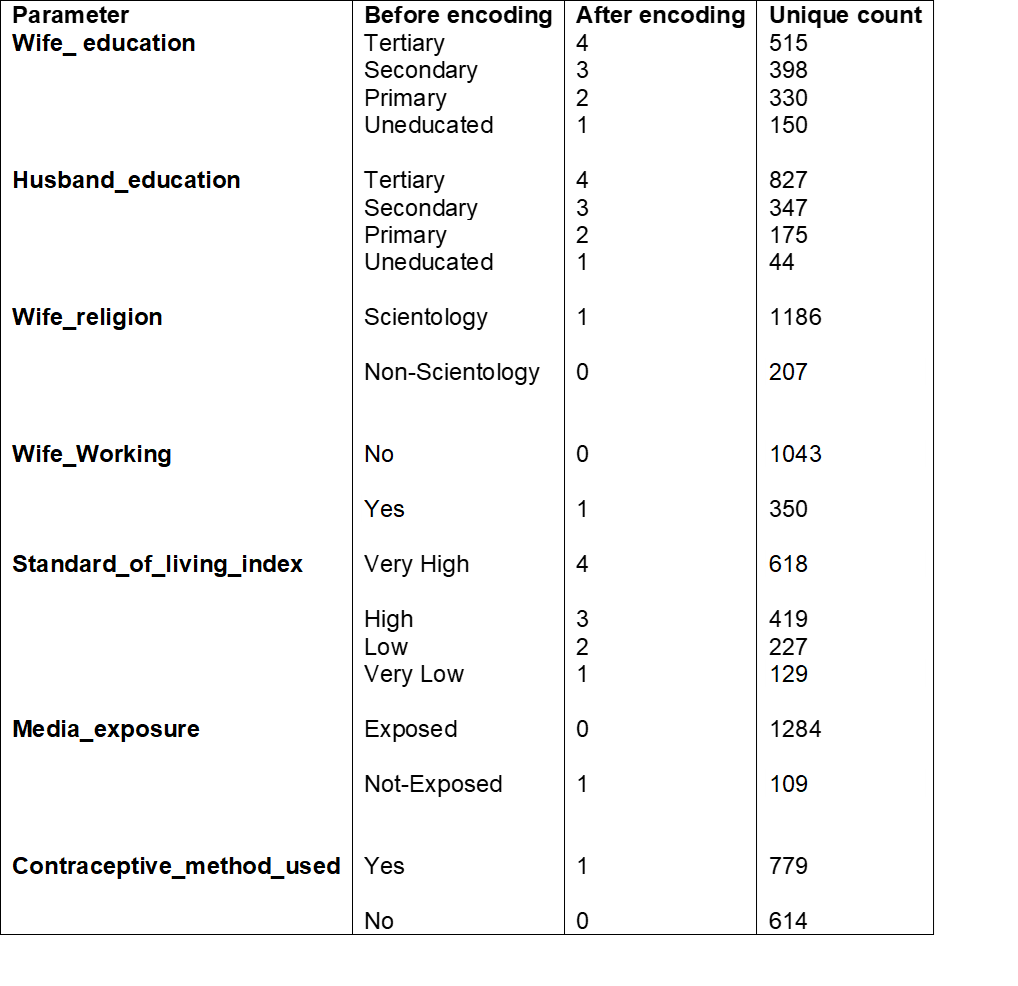

### In case of all binary classification the less frequent one has been designated as 1 and the frequent one as 0.However, as regard to the dependent variable to be predicted i.e. whether contraceptive method used/not, although the outcome "yes" is more frequent, it has been designated as 1 as this is the class of importance.

In [500]:
lists_=[ 'Wife_ education', 'Husband_education','Wife_religion', 'Wife_Working','Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ','Contraceptive_method_used']
for i in lists_ :
    adult_data[i]= adult_data[i].astype('int64')


In [501]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1393 non-null   float64
 1   Wife_ education            1393 non-null   int64  
 2   Husband_education          1393 non-null   int64  
 3   No_of_children_born        1393 non-null   float64
 4   Wife_religion              1393 non-null   int64  
 5   Wife_Working               1393 non-null   int64  
 6   Husband_Occupation         1393 non-null   int64  
 7   Standard_of_living_index   1393 non-null   int64  
 8   Media_exposure             1393 non-null   int64  
 9   Contraceptive_method_used  1393 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 152.0 KB


### Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis) and CART.

# Logistic Regression

In [502]:
# Copy all the predictor variables into X dataframe
X = adult_data.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = adult_data['Contraceptive_method_used']

In [503]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=adult_data['Contraceptive_method_used'])

In [505]:
# checking the proportion of 0 and 1 in the train data
y_train.value_counts(normalize=True)

1    0.558974
0    0.441026
Name: Contraceptive_method_used, dtype: float64

In [506]:
# checking the proportion of 0 and 1 in the train data
y_test.value_counts(normalize=True)

1    0.559809
0    0.440191
Name: Contraceptive_method_used, dtype: float64

Thus the proportion of 0 and 1 are equally distributed in the train and test data

### Logistic Regression Model

In [246]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [510]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.676923076923077

In [521]:
# Accuracy - Testing Data
model.score(X_test, y_test)

0.6483253588516746

### Confusion Matrix for the training data

In [256]:
confusion_matrix(y_train, ytrain_lr_predict)

array([[226, 204],
       [111, 434]], dtype=int64)

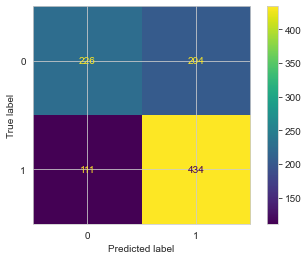

In [257]:
plot_confusion_matrix(model,X_train,y_train);

In [259]:
print(classification_report(y_train, ytrain_lr_predict))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59       430
           1       0.68      0.80      0.73       545

    accuracy                           0.68       975
   macro avg       0.68      0.66      0.66       975
weighted avg       0.68      0.68      0.67       975



### Confusion Matrix for test data

In [261]:
confusion_matrix(y_test, ytest_lr_predict)

array([[ 85,  99],
       [ 48, 186]], dtype=int64)

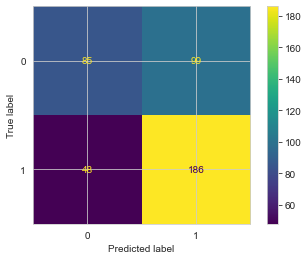

In [262]:
plot_confusion_matrix(model,X_test,y_test);

In [263]:
print(classification_report(y_test, ytest_lr_predict))

              precision    recall  f1-score   support

           0       0.64      0.46      0.54       184
           1       0.65      0.79      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.63       418
weighted avg       0.65      0.65      0.64       418



## AUC and ROC for the train test data for the Logistic Regression

AUC for the Training Data: 0.719
AUC for the Test Data: 0.666


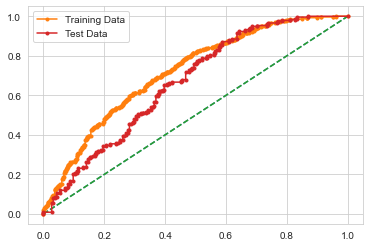

In [562]:
# predict probabilities
probs = model.predict_proba(X_train)
probs_train = probs[:, 1]

# calculate AUC for training data
auc_train_lr = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
probs = model.predict_proba(X_test)
probs_test = probs[:, 1]

# calculate AUC
auc_test_lr = metrics.roc_auc_score(y_test,probs_test)
print('AUC for the Test Data: %.3f' % auc_test_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Linear Discriminant Analysis

In [522]:
#Scaling the data which is a pre-requisite for LDA 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
Y = y

In [536]:
X_train_lda,X_test_lda,y_train_lda,y_test_lda = train_test_split(X_scaled,Y,test_size=0.30,random_state=1,stratify = Y)

In [525]:
#Build LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train_lda,Y_train_lda)
model_lda

LinearDiscriminantAnalysis()

### Checking on the train data

In [539]:
# Predict Y_test_lda
pred_class_train = model_lda.predict(X_train_lda)


In [541]:
#generate Confusion Matrix of the train data
confusion_matrix(y_train_lda, pred_class_train)

array([[219, 211],
       [108, 437]], dtype=int64)

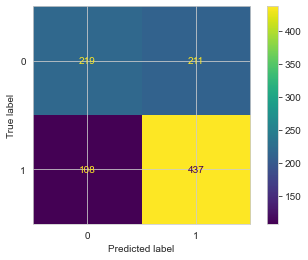

In [542]:
plot_confusion_matrix(model_lda,X_train_lda,y_train_lda);

In [544]:
print(classification_report(y_train_lda, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       430
           1       0.67      0.80      0.73       545

    accuracy                           0.67       975
   macro avg       0.67      0.66      0.66       975
weighted avg       0.67      0.67      0.66       975



### Testing on the test data

In [545]:
# Predict Y_test_lda
pred_class_test = model_lda.predict(X_test_lda)
#data_df['Prediction'] = pred_class 


In [546]:
#generate Confusion Matrix of the train data
confusion_matrix(Y_test_lda, pred_class_test)

array([[ 82, 102],
       [ 45, 189]], dtype=int64)

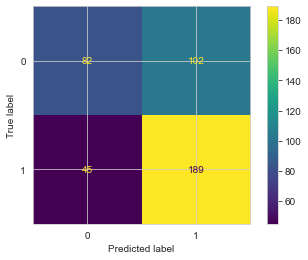

In [547]:
plot_confusion_matrix(model_lda,X_test_lda,Y_test_lda);

In [548]:
print(classification_report(Y_test_lda, pred_class_test))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53       184
           1       0.65      0.81      0.72       234

    accuracy                           0.65       418
   macro avg       0.65      0.63      0.62       418
weighted avg       0.65      0.65      0.64       418



AUC for the Training Data: 0.719
AUC for the Test Data: 0.664


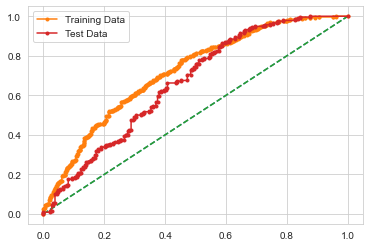

In [563]:
# predict probabilities
probs = model_lda.predict_proba(X_train_lda)
probs_train = probs[:, 1]

# calculate AUC for training data
auc_train_lda = roc_auc_score(y_train_lda, probs_train)
print('AUC for the Training Data: %.3f' % auc_train_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train_lda,probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
probs = model_lda.predict_proba(X_test_lda)
probs_test = probs[:, 1]

# calculate AUC
auc_test_lda = metrics.roc_auc_score(y_test_lda,probs_test)
print('AUC for the Test Data: %.3f' % auc_test_lda)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_lda,probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# CART

In [551]:
from sklearn.tree import DecisionTreeClassifier

In [552]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,min_samples_leaf=35,min_samples_split=100,random_state=1)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=35, min_samples_split=100,
                       random_state=1)

### Variable Importance

In [564]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.472380
Wife_age                  0.241360
Wife_ education           0.187319
Husband_education         0.060456
Standard_of_living_index  0.038484
Wife_religion             0.000000
Wife_Working              0.000000
Husband_Occupation        0.000000
Media_exposure            0.000000


In [554]:
y_train_predict = reg_dt_model.predict(X_train)
y_test_predict = reg_dt_model.predict(X_test)

# Model Evaluation

### Printing confusion matrix and classification report for train data

In [555]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       430
           1       0.73      0.81      0.77       545

    accuracy                           0.73       975
   macro avg       0.73      0.71      0.72       975
weighted avg       0.73      0.73      0.72       975



In [556]:
confusion_matrix(y_train, y_train_predict)

array([[264, 166],
       [101, 444]], dtype=int64)

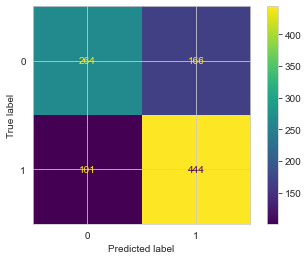

In [557]:
plot_confusion_matrix(reg_dt_model,X_train, y_train);

### Printing confusion matrix and classification report for test data

In [558]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.60      0.65       184
           1       0.72      0.80      0.76       234

    accuracy                           0.71       418
   macro avg       0.71      0.70      0.70       418
weighted avg       0.71      0.71      0.71       418



In [559]:
confusion_matrix(y_test, y_test_predict)

array([[110,  74],
       [ 47, 187]], dtype=int64)

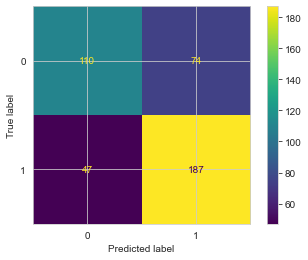

In [560]:
plot_confusion_matrix(reg_dt_model,X_test, y_test);

In [390]:
probs_train = reg_dt_model.predict_proba(X_train)[:,1]
auc_train=roc_auc_score(y_train, probs_train)

AUC for the Training Data: 0.806
AUC for the Test Data: 0.719


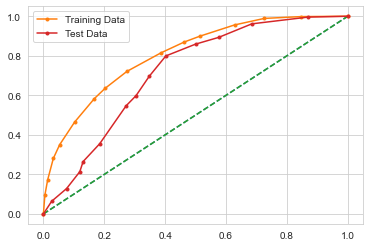

In [561]:
# predict probabilities
probs_train = reg_dt_model.predict_proba(X_train)
probs_train = probs_train[:, 1]

# calculate AUC for training data
auc_train=auc = roc_auc_score(y_train, probs_train)
print('AUC for the Training Data: %.3f' % auc_train)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data
probs_test = reg_dt_model.predict_proba(X_test)
probs_test = probs_test[:, 1]

# calculate AUC
auc_test = metrics.roc_auc_score(y_test,probs_test)
print('AUC for the Test Data: %.3f' % auc_test)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Comparison of various models LR,LDA and CART model to predict contraceptive method used

### Logistics regression model:
    For train data : Accuracy= 0.68  , f1 score=  0.73      , recall=  0.8    , precision= 0.68 , auc score=  0.72      ;
    For test data : Accuracy=  0.65 , f1 score=   0.72     , recall=   0.79   , precision= 0.65 , auc score=  0.67      ;    

### LDA model:
    For train data : Accuracy= 0.67  , f1 score=  0.73      , recall=  0.80    , precision= 0.67 , auc score=  0.72      ;
    For test data : Accuracy=  0.65 , f1 score=   0.72     , recall=   0.81   , precision= 0.65 , auc score=  0.66      ; 

### CART model:
    For train data : Accuracy= 0.73  , f1 score=  0.77      , recall=  0.81    , precision= 0.73 , auc score=  0.81      ;
    For test data : Accuracy=  0.71 , f1 score=   0.76     , recall=   0.80   , precision= 072 , auc score=  0.72      ;  

#### Thus out of LR,LDA and CART model, CART model is having highest auc score in both training and testing data.All other critical paramerets such as Accuracy, f1 score,recall and precision are also very consistent between the training and testing data removing the chance of overfitting.Thus the CART model will be selected for prediction

# Inference

The problem is to predict do/don't they use a contraceptive method of choice based on their demographic and socio-economic characteristics.Thus overall accuracy is the most suitable parameter to judge a model efficiency.The CART model had 73% accuracy in predicting correct classification.

No_of_children_born, Wife_age,Wife_education (in same order of preference) are the most important variables in determining if a couple is likely to use contraceptive or not.